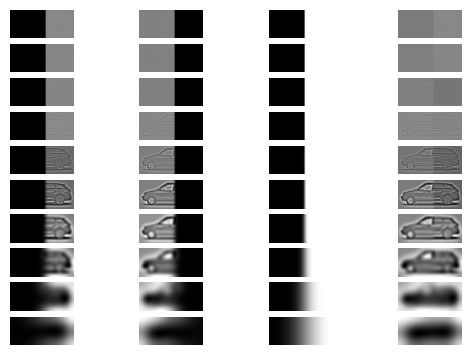

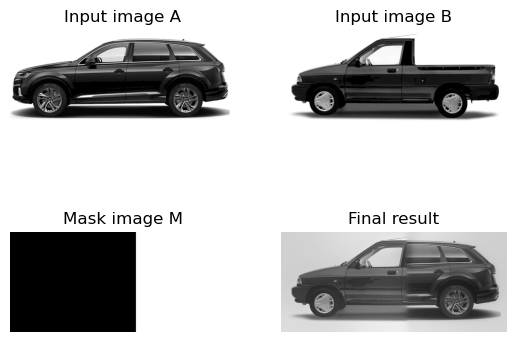

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input images A, B, and the mask image M
base = 'C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\inputs\\P4\\I\\{}'
imgA = cv2.imread(base.format('audi_q7.png'), cv2.IMREAD_GRAYSCALE).astype(np.float32)
imgB = cv2.imread(base.format('saipa_151.png'), cv2.IMREAD_GRAYSCALE).astype(np.float32)
mask = cv2.imread(base.format('audi_saipa_mask.png'), cv2.IMREAD_GRAYSCALE).astype(np.float32)

num_levels = 11
base_sigma = 0.125
    
# Initialize the Laplacian filtered images and the combined images
lap_A = []
lap_B = []
comb = []

# Build the Laplacian filtered images and the combined images for each level
for i in range(num_levels):
    # Compute the sigma for the current level
    sigma = base_sigma * 2**i

    # Apply the Gaussian filter to images A and B
    gauss_A = cv2.GaussianBlur(imgA, (0,0), sigma)
    gauss_B = cv2.GaussianBlur(imgB, (0,0), sigma)

    
    if i>0:
        # Compute the Laplacian filtered images
        L_A = prev_gauss_A - gauss_A
        L_B = prev_gauss_B - gauss_B
        L_A = cv2.normalize(L_A,  np.zeros_like(L_A), 0, 255, cv2.NORM_MINMAX)
        L_B = cv2.normalize(L_B,  np.zeros_like(L_B), 0, 255, cv2.NORM_MINMAX)
        lap_A.append(L_A)
        lap_B.append(L_B)
        
        # Normalize the mask image and apply the Gaussian filter
        gauss_mask = cv2.GaussianBlur(mask, (0,0), sigma)
        
        # draw intermediate result
        plt.subplot(num_levels, 4, 1+4*i)
        plt.imshow(gauss_mask*lap_A[-1], cmap='gray')
        plt.axis('off')

        plt.subplot(num_levels, 4, 2+4*i)
        plt.imshow((255-gauss_mask)*lap_B[-1], cmap='gray')
        plt.axis('off')

        plt.subplot(num_levels, 4, 3+4*i)
        plt.imshow(gauss_mask, cmap='gray')
        plt.axis('off')

        plt.subplot(num_levels, 4, 4+4*i)
        plt.imshow(gauss_mask*lap_A[-1] + (255-gauss_mask)*lap_B[-1], cmap='gray')
        plt.axis('off')

        # Compute the combined image for this level
        comb.append(gauss_mask * lap_A[-1] + (255 - gauss_mask) * lap_B[-1])

    prev_gauss_A = gauss_A
    prev_gauss_B = gauss_B

plt.show()


# Compute the final result by summing the combined images for all levels
result = np.zeros_like(imgA)
for C in comb:
    result = cv2.add(result, C)

# Display the input images, mask image, and final result
plt.subplot(2, 2, 1)
plt.imshow(imgA, cmap='gray')
plt.title('Input image A')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(imgB, cmap='gray')
plt.title('Input image B')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mask, cmap='gray')
plt.title('Mask image M')
plt.axis('off')

result = cv2.normalize(result,  np.zeros_like(result), 0, 255, cv2.NORM_MINMAX)
# result = np.where(np.logical_and(0<=result, result<50), 0.2*result, result)
# result = np.where(np.logical_and(50<=result, result<150), 1.5*(result-50)+30, result)
# result = np.where(150<=result, 1*(result-150)+200, result)

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title('Final result')
plt.axis('off')

plt.show()

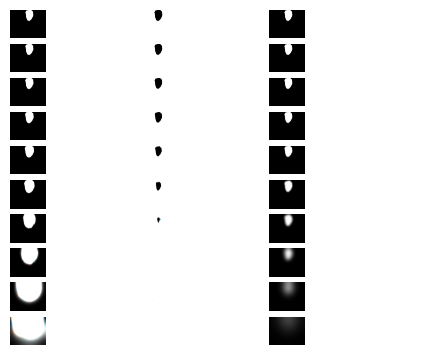

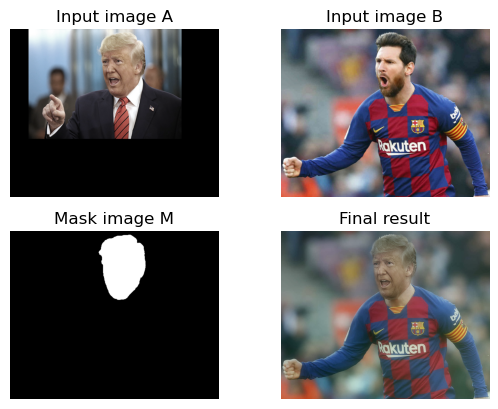

In [107]:
base = 'C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\inputs\\P4\\II\\{}'
imgB = cv2.imread(base.format('messi.png'), cv2.IMREAD_COLOR).astype(np.float32)
imgA = cv2.imread(base.format('trump.png'), cv2.IMREAD_COLOR).astype(np.float32)
mask = cv2.imread(base.format('messi_trump_mask.png'), cv2.IMREAD_GRAYSCALE).astype(np.float32)

num_levels = 11
base_sigma = 0.125
    
# Initialize the Laplacian filtered images and the combined images
lap_A = []
lap_B = []
comb = []

# Build the Laplacian filtered images and the combined images for each level
for i in range(num_levels):
    # Compute the sigma for the current level
    sigma = base_sigma * 2**i

    # Apply the Gaussian filter to images A and B
    gauss_A = cv2.GaussianBlur(imgA, (0,0), sigma)
    gauss_B = cv2.GaussianBlur(imgB, (0,0), sigma)

    
    if i>0:
        # Compute the Laplacian filtered images
        L_A = prev_gauss_A - gauss_A
        L_B = prev_gauss_B - gauss_B
        L_A = cv2.normalize(L_A,  np.zeros_like(L_A), 0, 255, cv2.NORM_MINMAX)
        L_B = cv2.normalize(L_B,  np.zeros_like(L_B), 0, 255, cv2.NORM_MINMAX)
        lap_A.append(L_A)
        lap_B.append(L_B)
        
        # Normalize the mask image and apply the Gaussian filter
        # gauss_mask = cv2.GaussianBlur(mask, (0,0), sigma)
        gauss_mask = np.tile(cv2.GaussianBlur(mask, (0,0), sigma)[..., np.newaxis], (1, 1, 3))
        
        # draw intermediate result
        plt.subplot(num_levels, 4, 1+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(gauss_mask*lap_A[-1]), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(num_levels, 4, 2+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs((255-gauss_mask)*lap_B[-1]), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(num_levels, 4, 3+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(gauss_mask), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(num_levels, 4, 4+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(gauss_mask*lap_A[-1] + (255-gauss_mask)*lap_B[-1]), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        # Compute the combined image for this level
        comb.append(gauss_mask * lap_A[-1] + (255 - gauss_mask) * lap_B[-1])

    prev_gauss_A = gauss_A
    prev_gauss_B = gauss_B

plt.show()

# Compute the final result by summing the combined images for all levels
result = np.zeros_like(imgA)
for C in comb:
    result = cv2.add(result, C)

# Display the input images, mask image, and final result
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(imgA), cv2.COLOR_BGR2RGB))
plt.title('Input image A')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(imgB), cv2.COLOR_BGR2RGB))
plt.title('Input image B')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(mask), cv2.COLOR_BGR2RGB))
plt.title('Mask image M')
plt.axis('off')


result = cv2.normalize(result,  np.zeros_like(result), 0, 255, cv2.NORM_MINMAX)
result = cv2.convertScaleAbs(result)
# result = np.where(np.logical_and(0<=result, result<50), 0.2*result, result)
# result = np.where(np.logical_and(50<=result, result<150), 1.5*(result-50)+30, result)
# result = np.where(150<=result, 1*(result-150)+200, result)

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Final result')
plt.axis('off')

plt.show()


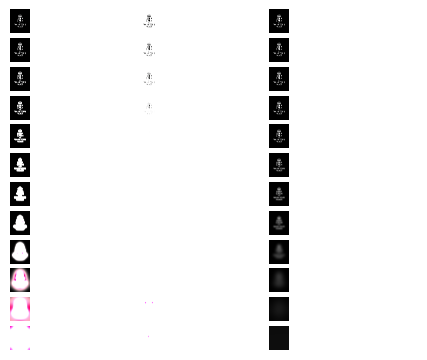

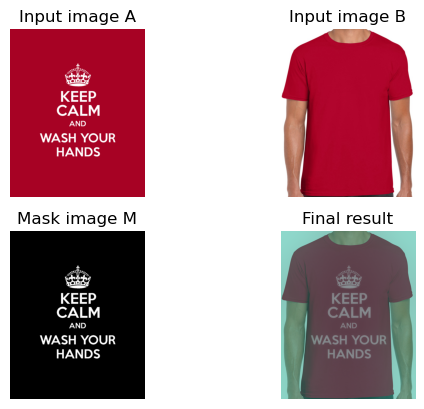

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

base = 'C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\inputs\\P4\\III\\{}'
imgA = cv2.imread(base.format('keep_calm.png'), cv2.IMREAD_COLOR).astype(np.float32)
imgB = cv2.imread(base.format('t-shirt.png'), cv2.IMREAD_COLOR).astype(np.float32)
mask = cv2.imread(base.format('keep_calm.png'), cv2.IMREAD_GRAYSCALE).astype(np.float32)

mask = np.where(mask>127, 255., 0.)
pad_width = [((imgB.shape[i] - mask.shape[i])//2, (imgB.shape[i] - mask.shape[i])//2) for i in range(2)]
mask = np.pad(mask, tuple(pad_width), mode='constant')

pad_image = np.full_like(imgB, [255,255,255])
img_offset = [(imgB.shape[i]-imgA.shape[i])//2 for i in range(3)]
pad_image[img_offset[0]:-img_offset[0],img_offset[1]:-img_offset[1]]=imgA
imgA = pad_image

num_levels = 13
base_sigma = 0.125
    
# Initialize the Laplacian filtered images and the combined images
lap_A = []
lap_B = []
comb = []

# Build the Laplacian filtered images and the combined images for each level
for i in range(num_levels):
    # Compute the sigma for the current level
    sigma = base_sigma * 2**i

    # Apply the Gaussian filter to images A and B
    gauss_A = cv2.GaussianBlur(imgA, (0,0), sigma)
    gauss_B = cv2.GaussianBlur(imgB, (0,0), sigma)

    
    if i>0:
        # Compute the Laplacian filtered images
        L_A = prev_gauss_A - gauss_A
        L_B = prev_gauss_B - gauss_B
        L_A = cv2.normalize(L_A,  np.zeros_like(L_A), 0, 255, cv2.NORM_MINMAX)
        L_B = cv2.normalize(L_B,  np.zeros_like(L_B), 0, 255, cv2.NORM_MINMAX)
        lap_A.append(L_A)
        lap_B.append(L_B)
        
        # Normalize the mask image and apply the Gaussian filter
        # gauss_mask = cv2.GaussianBlur(mask, (0,0), sigma)
        gauss_mask = np.tile(cv2.GaussianBlur(mask, (0,0), sigma)[..., np.newaxis], (1, 1, 3))
        
        # draw intermediate result
        plt.subplot(num_levels, 4, 1+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(gauss_mask*lap_A[-1]), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(num_levels, 4, 2+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs((255-gauss_mask)*lap_B[-1]), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(num_levels, 4, 3+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(gauss_mask), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(num_levels, 4, 4+4*i)
        plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(gauss_mask*lap_A[-1] + (255-gauss_mask)*lap_B[-1]), cv2.COLOR_BGR2RGB))
        plt.axis('off')

        # Compute the combined image for this level
        comb.append(gauss_mask * lap_A[-1] + (255 - gauss_mask) * lap_B[-1])

    prev_gauss_A = gauss_A
    prev_gauss_B = gauss_B

plt.show()

# Compute the final result by summing the combined images for all levels
result = np.zeros_like(imgA).astype(np.float64)
for C in comb:
    result = cv2.add(result, C)

# Display the input images, mask image, and final result
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(imgA), cv2.COLOR_BGR2RGB))
plt.title('Input image A')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(imgB), cv2.COLOR_BGR2RGB))
plt.title('Input image B')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(cv2.convertScaleAbs(mask), cv2.COLOR_BGR2RGB))
plt.title('Mask image M')
plt.axis('off')


result = cv2.normalize(result,  np.zeros_like(result), 0, 255, cv2.NORM_MINMAX)
result = cv2.convertScaleAbs(result)
# result = np.where(np.logical_and(0<=result, result<50), 0.2*result, result)
# result = np.where(np.logical_and(50<=result, result<150), 1.5*(result-50)+30, result)
# result = np.where(150<=result, 1*(result-150)+200, result)


plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Final result')
plt.axis('off')

plt.show()
